# Recursive Least Squares
## Copper Dataset

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(sm.datasets.copper.DESCRLONG)

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



In [4]:
data = sm.datasets.copper.load_pandas().data

In [5]:
data.head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


In [7]:
data.columns

Index(['WORLDCONSUMPTION', 'COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX', 'TIME'],
      dtype='object')

In [8]:
data.index = pd.date_range("1951-01-01", "1975-01-01", freq="AS")
endog = data['WORLDCONSUMPTION']
exog = sm.add_constant(data[['COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX']])

In [11]:
model = sm.RecursiveLS(endog, exog)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Sat, 21 Aug 2021   R-squared:                       0.965
Time:                        11:50:08   AIC                            319.441
Sample:                    01-01-1951   BIC                            325.535
                         - 01-01-1975   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401     15.853      0.000    1.06e+04    1.36e+04
ALUMPRICE         70.4146     32.678      2.155      0.031       6.367     134.462
INVENTORYINDEX   311.7330   2130.084      0.146      0.884   -3863.155    4486.621
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.14   Prob(JB):                         0.43
Heteroskedasticity (H):               3.38   Skew:                            -0.67
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""

In [10]:
res.recursive_coefficients.filtered[0]

array([ 2.88890087e+00,  4.94795049e+00,  1.55841803e+03,  1.95843327e+03,
       -5.14749533e+04, -4.16895194e+03, -2.25261358e+03, -4.46559153e+02,
       -5.28839797e+03, -6.94231937e+03, -7.84608904e+03, -6.64315123e+03,
       -6.27411017e+03, -7.27201698e+03, -6.31902650e+03, -5.82223930e+03,
       -6.25630904e+03, -6.73740447e+03, -6.47742843e+03, -5.99590748e+03,
       -6.45080679e+03, -6.02292168e+03, -5.25835153e+03, -5.32089137e+03,
       -6.56237194e+03])

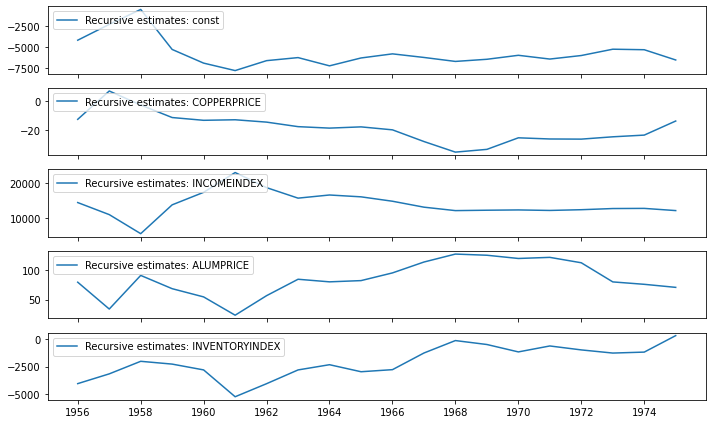

In [15]:
res.plot_recursive_coefficient(range(model.k_exog), alpha=None, figsize=(10,6));

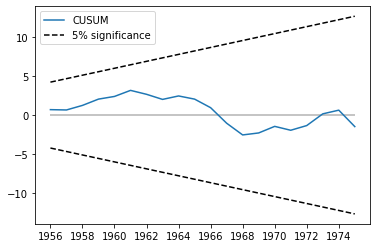

In [18]:
res.plot_cusum();

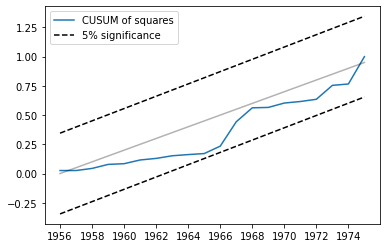

In [20]:
res.plot_cusum_squares();